### Importing Libraries

In [45]:
import os

# data manipulation
import numpy as np
import pandas as pd
from datetime import datetime

# data imputation
from sklearn.impute import SimpleImputer

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Data Ingestion

In [46]:
os.chdir('..')
os.chdir('data')
dataframe= pd.read_csv('marketing_campaign.csv', sep= '\t')
os.chdir('..')
os.chdir('notebooks')

### Assessing the Data

#### Checking NaN values

In [47]:
dataframe.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

##### Observations:
- Income feature column has 24 data points with NaN values.

#### Checking Duplicated Rows

In [48]:
dataframe.duplicated().sum()

0

##### Observations:
- Dataframe doesn't contain any duplicated values.

#### Checking Data Type for Columns

In [49]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Checking Descriptive Statistics

In [50]:
dataframe.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


##### Observations:
- NaN values in Income column can be imputed with median value.
- Dt_Customer column can be used for further feature engineering.

### Data Handling

#### Separating Columns

In [51]:
N_columns= dataframe.select_dtypes(exclude= 'O').columns
C_columns= dataframe.select_dtypes(include= 'O').columns

#### Exercising Imputation on Numerical Columns

In [52]:
imputer= SimpleImputer(strategy= 'median')

In [53]:
dataframe[N_columns]= imputer.fit_transform(dataframe[N_columns])

In [54]:
dataframe.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

The NaN values in Income column have been replaced by median value.

#### Performing Feature Engineering on Dt_Customer

In [55]:
dataframe.Dt_Customer= pd.to_datetime(dataframe.Dt_Customer, format= '%d-%m-%Y')

##### Position of Dt_Customer column in dataframe

In [56]:
dataframe.columns.get_loc('Dt_Customer')

7

Now that we have the location of Dt_Customer column, we will add the columns to right side of this location.

In [57]:
day_component= dataframe.Dt_Customer.dt.day
month_component= dataframe.Dt_Customer.dt.month
year_component= dataframe.Dt_Customer.dt.year

In [58]:
dataframe.insert(loc= 8, column= 'Dt_Customer_D', value= day_component)
dataframe.insert(loc= 9, column= 'Dt_Customer_M', value= month_component)
dataframe.insert(loc= 10, column= 'Dt_Customer_Y', value= year_component)

In [60]:
dataframe.drop('Dt_Customer', axis= 1, inplace= True)

In [61]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   float64
 1   Year_Birth           2240 non-null   float64
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   float64
 6   Teenhome             2240 non-null   float64
 7   Dt_Customer_D        2240 non-null   int32  
 8   Dt_Customer_M        2240 non-null   int32  
 9   Dt_Customer_Y        2240 non-null   int32  
 10  Recency              2240 non-null   float64
 11  MntWines             2240 non-null   float64
 12  MntFruits            2240 non-null   float64
 13  MntMeatProducts      2240 non-null   float64
 14  MntFishProducts      2240 non-null   float64
 15  MntSweetProducts     2240 non-null   f

The data has been cleaned.

## Data Visualization

### Education vs. Income

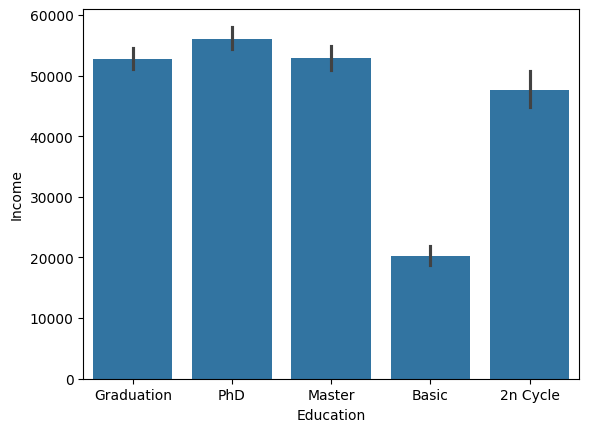

In [70]:
sns.barplot(x= dataframe.Education,
            y= dataframe.Income);

##### Observations:
- Education level is directly proportional to the Income.

### Marital_Status vs. Income

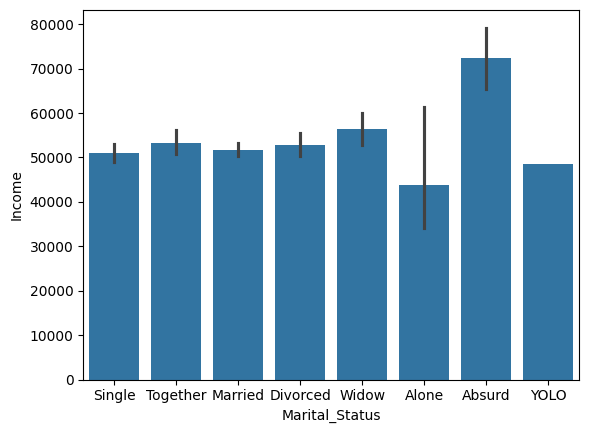

In [71]:
sns.barplot(x= dataframe.Marital_Status,
            y= dataframe.Income);

##### Observations:
- Absurd category has highest Income.
- Alone category has lowest Income and highest variance.

### Income vs. Minor Count

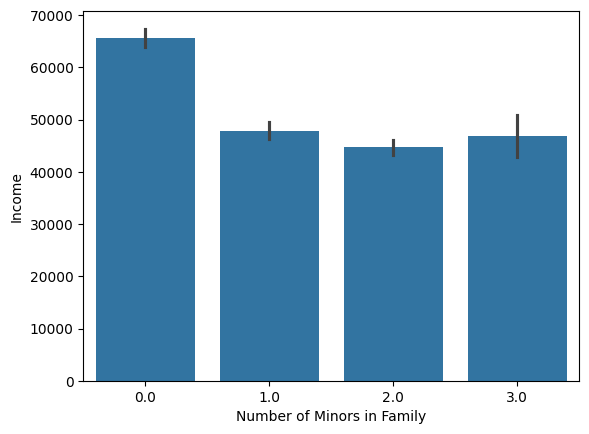

In [85]:
sns.barplot(x= dataframe.Teenhome + dataframe.Kidhome,
            y= dataframe.Income)
plt.xlabel('Number of Minors in Family');

##### Observations:
- People with no minors have higher income.
- People with 2 minors have lowest income.
- People with 3 minors have highest variance in Income.

### Count of People in each Campagin

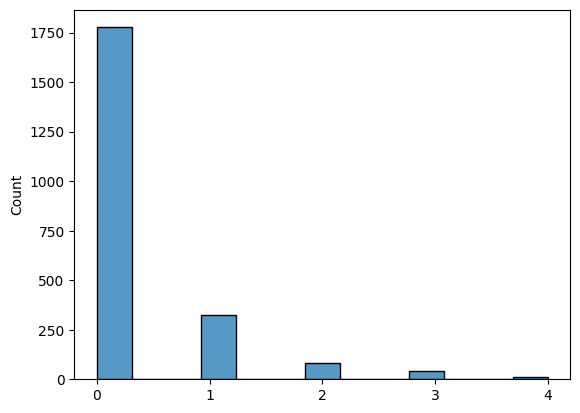

In [95]:
sns.histplot(x= list(map(int, (dataframe.AcceptedCmp1 + dataframe.AcceptedCmp2 + dataframe.AcceptedCmp3 + dataframe.AcceptedCmp4 + dataframe.AcceptedCmp5))))
plt.xticks(range(0, 5));

##### Observations:
- There is an exponential rate of drop off in campagin sign-ins.